<a href="https://colab.research.google.com/github/GentaKanno/irohacho/blob/main/irohacho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 必要なライブラリをインポート
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 4. 画像をグレースケールで読み込み
img = cv2.imread("no-hira.png", cv2.IMREAD_GRAYSCALE)

# 5. 二値化処理（大津の二値化法を使用）
# cv2.threshold(入力画像, 閾値, 最大値, 閾値処理タイプ)
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === パラメータ設定 ===
out_size = 256
margin = 20

# === 元画像の縦横を取得 ===
h, w = img.shape[:2]

# === 縦横の長い方を基準にスケーリング ===
scale = (out_size - 2 * margin) / max(h, w)
new_w, new_h = int(w * scale), int(h * scale)

# === リサイズ ===
resized = cv2.resize(img, (new_w, new_h))

# === 背景（白）を作成 ===
square = np.ones((out_size, out_size, 3), dtype=np.uint8) * 255  # 白背景

# === 中央に貼り付け ===
top = (out_size - new_h) // 2
left = (out_size - new_w) // 2
square[top:top+new_h, left:left+new_w] = resized

# === 結果表示 ===
plt.imshow(cv2.cvtColor(square, cv2.COLOR_BGR2RGB))
plt.title("Square Image")
plt.axis('off')
plt.show()

# === 保存 ===
cv2.imwrite("no-hira-square.png", square)
print("✅ 保存完了: no-hira-squarepng")

ValueError: could not broadcast input array from shape (216,216) into shape (216,216,3)

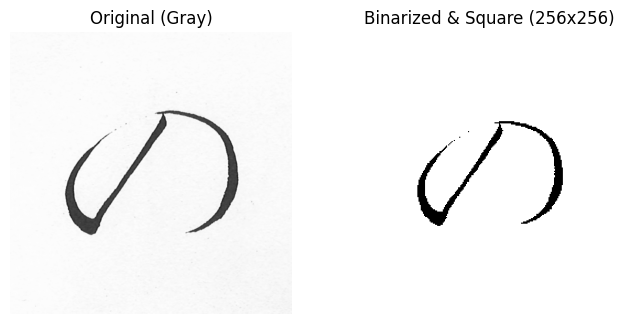

✅ 保存完了: no-hira-square.png


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === パラメータ設定 ===
out_size = 256  # 出力画像の一辺
margin = 20     # 余白（四方）

# === 画像読み込み（グレースケール）===
img = cv2.imread("no-hira.png", cv2.IMREAD_GRAYSCALE)

# === 二値化（大津の方法）===
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === 元画像サイズ ===
h, w = binary.shape[:2]

# === スケーリング計算 ===
scale = (out_size - 2 * margin) / max(h, w)
new_w, new_h = int(w * scale), int(h * scale)

# === リサイズ ===
resized = cv2.resize(binary, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

# === 背景（白）を作成 ===
square = np.ones((out_size, out_size), dtype=np.uint8) * 255  # 白背景

# === 中央に貼り付け ===
top = (out_size - new_h) // 2
left = (out_size - new_w) // 2
square[top:top+new_h, left:left+new_w] = resized

# === 結果表示 ===
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original (Gray)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Binarized & Square (256x256)")
plt.imshow(square, cmap='gray')
plt.axis('off')

plt.show("no-hira-square.png")

# === 保存 ===
cv2.imwrite("no-hira-square.png", square)
print("✅ 保存完了: no-hira-square.png")